In [6]:
import os
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

In [9]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data.drop('Unnamed: 0', axis=1,inplace=True)

In [12]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X = pca.fit_transform(X)

In [4]:
input_directory = '/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/models/clustering/modeli'


clustering_models=[]
        
for file_name in os.listdir(input_directory):
    if file_name == '.ipynb_checkpoints':
        continue  # Preskoči ovaj direktorijum
    file_path = os.path.join(input_directory, file_name)
    with open(file_path, 'rb') as f:
        clustering_models.append(pickle.load(f))


In [5]:
clustering_models

[GaussianMixture(n_components=7),
 BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=5,
                 random_state=0),
 KMeans(init='random', max_iter=500, n_init=100)]

In [7]:
model_names = ['Gaus', 'BisectingKMeans', 'KMeans']

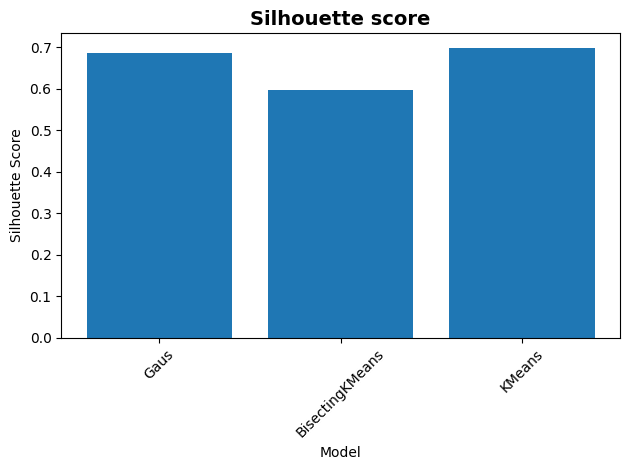

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# clustering_models sadrži vaše modele klasterovanja
# model_names sadrži imena modela

silhouette_scores = []

for model, model_name in zip(clustering_models, model_names):
    labels = model.fit_predict(X)  # Korišćenje fit_predict 
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.bar(model_names, silhouette_scores)
plt.title('Silhouette score', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Silhouette Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


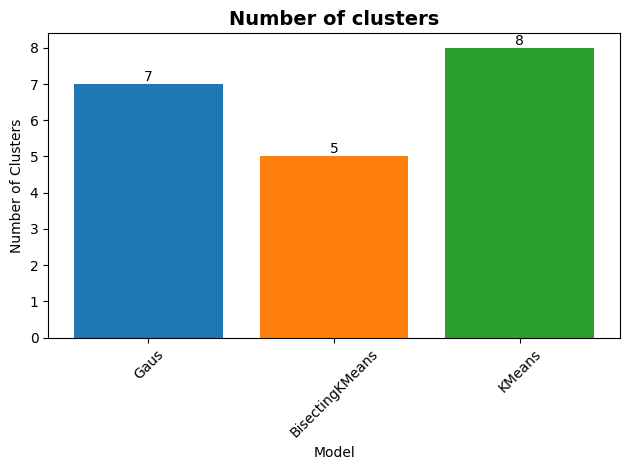

In [22]:
import matplotlib.pyplot as plt


for model, model_name in zip(clustering_models, model_names):
    if hasattr(model, 'n_components'):
        n_clusters = model.n_components
    elif hasattr(model, 'n_clusters'):
        n_clusters = model.n_clusters
    else:
        raise ValueError("Model doesn't have n_components or n_clusters attribute")
    
    clusters_bar = plt.bar(model_name, n_clusters)
 
    for bar in clusters_bar:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, str(n_clusters), ha='center', va='bottom')
    
plt.locator_params(axis='y', integer=True)
plt.title('Number of clusters', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Number of Clusters')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
